In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

result = pd.DataFrame(columns=['name', "psnr", 'ssim', 'digit', 'model', "model_index"])

for i in range(10):
    base = f"MNIST_{i}"
    name_orders = []
    path1 = base + "_siren_pixel_checkpoint"
    path2 = base + "_eoren_pixel_checkpoint"
    path3 = base + "_siren_grad_checkpoint"
    for image_full_name in sorted(os.listdir(path1)):
        image_name = image_full_name.split("_")[0]
        name_orders.append(image_name)
        image_df = pd.read_csv(os.path.join(path1, image_full_name)+"/result.csv")
        # PSNR[-1].append(image_df.iloc[-1,3])
        # SSIM[-1].append(image_df.iloc[-1,4])
        result = result.append({'name':image_name, 'digit':i, 'psnr':image_df.iloc[-1,3], 
                                'ssim':image_df.iloc[-1, 4], 
                                'model':'SIREN+pixel',
                                "model_index":2}, ignore_index=True)
    for j, n, path in zip([3,1],['EoREN', 'SIREN+grad'],[path2, path3]):
        names = [] 
        for name in name_orders:
            for image_full_name in os.listdir(path):
                if name in image_full_name:
                    names.append(image_full_name)
                    break
        for image_full_name in names:
            image_name = image_full_name.split("_")[0]
            image_df = pd.read_csv(os.path.join(path, image_full_name)+"/result.csv")
            # PSNR[-1].append(image_df.iloc[-1,3])
            # SSIM[-1].append(image_df.iloc[-1,4])
            result = result.append({'name':image_name, 'digit':i, 'psnr':image_df.iloc[-1,3], 
                                    'ssim':image_df.iloc[-1, 4], 
                                    "model":n,
                                    "model_index":j}, ignore_index=True)


In [72]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [73]:
result['digit'] = result['digit'].astype(int)
result.head()
result = result.sort_values(by="model_index")

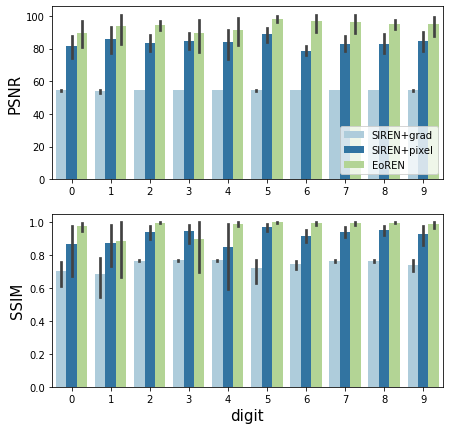

In [74]:
fig, ax = plt.subplots(2,1, figsize=(7,7))
sns.set_palette("Paired")
sns.barplot(x='digit', y='psnr', data=result, hue='model', ax=ax[0])
sns.barplot(x='digit', y='ssim', data=result, hue='model', ax=ax[1])
ax[1].legend([],[], frameon=False)
ax[0].set_ylabel("PSNR", fontsize=15)
ax[0].set_xlabel("", fontsize=15)
ax[1].set_xlabel("digit", fontsize=15)
ax[1].set_ylabel("SSIM", fontsize=15)
ax[0].legend(loc="lower right")
plt.savefig("mnist_performance.pdf")

In [75]:
result.groupby(['model']).mean()

,psnr,ssim,digit
model,,,
EoREN,93.968331,0.970479,4.5
SIREN+grad,54.545583,0.741004,4.5
SIREN+pixel,83.697647,0.915630,4.5
